In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import WhatHappened as t2
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [3]:
df.shape
#num_rows = df.shape[0] #Provide the number of rows in the dataset
#num_cols = df.shape[1] #Provide the number of columns in the dataset

(19102, 154)

In [4]:
# What happened
# A look at the data -- summary statistics
df.describe()


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [5]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [6]:
df.dtypes
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [10]:
cat_df = df.select_dtypes(include=['object','O']) 
cat_df.describe()
#cat_df.shape()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
count,19102,19102,19102,19102,19102,19102,15899,16471,14653,14609,...,12462,12385,11668,12910,12853,12218,12803,12736,12706,12760
unique,5,4,165,4,7,9,16,7,10,11,...,5,5,5,20,10,59,5,5,5,5
top,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,20 to 99 employees,"Privately-held limited company, not in startup...",...,Strongly agree,Somewhat agree,Disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
freq,13774,9260,4364,14233,13655,8099,8098,5876,3214,6283,...,5412,3308,6902,11664,3671,8954,4140,5753,8017,5482


In [8]:
set(cat_df)

{'AnnoyingUI',
 'AssessJobCommute',
 'AssessJobCompensation',
 'AssessJobDept',
 'AssessJobDiversity',
 'AssessJobExp',
 'AssessJobFinances',
 'AssessJobIndustry',
 'AssessJobLeaders',
 'AssessJobOffice',
 'AssessJobProduct',
 'AssessJobProfDevel',
 'AssessJobProjects',
 'AssessJobRemote',
 'AssessJobRole',
 'AssessJobTech',
 'AuditoryEnvironment',
 'BoringDetails',
 'BuildingThings',
 'ChallengeMyself',
 'ChangeWorld',
 'CheckInCode',
 'ClickyKeys',
 'CollaborateRemote',
 'CompanySize',
 'CompanyType',
 'CompetePeers',
 'Country',
 'CousinEducation',
 'Currency',
 'DeveloperType',
 'DifficultCommunication',
 'DiversityImportant',
 'EducationImportant',
 'EducationTypes',
 'EmploymentStatus',
 'EnjoyDebugging',
 'EquipmentSatisfiedCPU',
 'EquipmentSatisfiedMonitors',
 'EquipmentSatisfiedRAM',
 'EquipmentSatisfiedRW',
 'EquipmentSatisfiedStorage',
 'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoder

In [11]:
Num_df=df.select_dtypes(include=['float64','int'])
Num_df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [13]:
set(Num_df)

{'CareerSatisfaction',
 'ExpectedSalary',
 'HoursPerWeek',
 'JobSatisfaction',
 'Respondent',
 'Salary',
 'StackOverflowSatisfaction'}

In [12]:
set(schema[schema['Column']=='FormalEducation']['Question'])


{"Which of the following best describes the highest level of formal education that you've completed?"}

In [14]:
#Provide a set of columns with more than 50% of the values missing
prop_null=df['FormalEducation'].isnull().mean() > 0.5
prop_null

False

In [15]:
no_nulls =df['FormalEducation'].isnull().sum() #Provide a set of columns with 0 missing values.
no_nulls

0

In [16]:
#---Proportion of individuals in the dataset
prop_null = 1 - df.isnull()['FormalEducation'].mean()

prop_null

1.0

In [17]:
status_vals = df.FormalEducation.value_counts()



In [22]:
perct_FormEd=df.FormalEducation.value_counts()/df.FormalEducation.shape[0]-df.FormalEducation.isnull().sum()
perct_FormEd

Bachelor's degree                                                    0.423987
Master's degree                                                      0.216888
Some college/university study without earning a bachelor's degree    0.150194
Secondary school                                                     0.116585
Doctoral degree                                                      0.028845
I prefer not to answer                                               0.021411
Primary/elementary school                                            0.021150
Professional degree                                                  0.013349
I never completed any formal education                               0.007591
Name: FormalEducation, dtype: float64

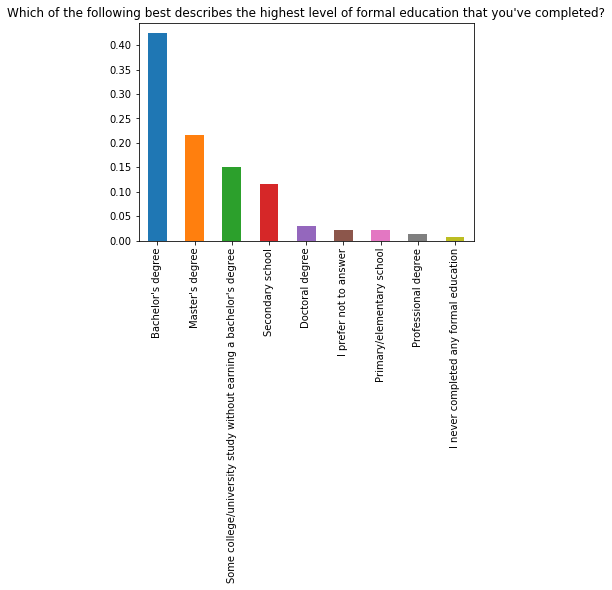

In [18]:
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Which of the following best describes the highest level of formal education that you've completed?");

In [80]:
# Using statistics to answer questions and draw insight --- grouping/ungrouping feature?
higher_ed = lambda x: 'Yes' if x in ("Master's degree", "Doctoral", "Professional degree","Bachelor's degree") else 'No'



In [81]:
df["FormalEducation"].describe()

count                 19102
unique                    9
top       Bachelor's degree
freq                   8099
Name: FormalEducation, dtype: object

In [82]:
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
df['HigherEd'].describe().reset_index()

#higher_ed_perc = df['HigherEd'].mean()
#higher_ed_perc

,index,HigherEd
0,count,19102
1,unique,2
2,top,Yes
3,freq,12497


In [85]:
df['HigherEd'].dtype
df['FormalEducation'].dtype

dtype('O')

In [88]:
formEd=df[df['FormalEducation'].isnull()==False]['CareerSatisfaction']
formEd.describe().reset_index()

,index,CareerSatisfaction
0,count,16102.000000
1,mean,7.343932
2,std,1.919330
3,min,0.000000
4,25%,6.000000
5,50%,8.000000
6,75%,9.000000
7,max,10.000000


In [89]:
formEd=df[df['HigherEd'].isnull()==False]['CareerSatisfaction']
formEd.describe().reset_index()

,index,CareerSatisfaction
0,count,16102.000000
1,mean,7.343932
2,std,1.919330
3,min,0.000000
4,25%,6.000000
5,50%,8.000000
6,75%,9.000000
7,max,10.000000


In [94]:
df.groupby(['HigherEd']).sum()['CareerSatisfaction'].sort_values().dropna().reset_index()


,HigherEd,CareerSatisfaction
0,No,33068.0
1,Yes,85184.0


In [29]:
# Using statistics to answer questions and draw insight
df['CareerSatisfaction'].isnull().mean()

0.15705161763166162

In [92]:
df.groupby(['FormalEducation']).mean()['CareerSatisfaction'].sort_values().dropna().reset_index()

,FormalEducation,CareerSatisfaction
0,I never completed any formal education,7.196581
1,Master's degree,7.300302
2,Bachelor's degree,7.322164
3,I prefer not to answer,7.338542
4,Secondary school,7.348285
5,Primary/elementary school,7.406897
6,Some college/university study without earning ...,7.424099
7,Professional degree,7.465812
8,Doctoral degree,7.574349


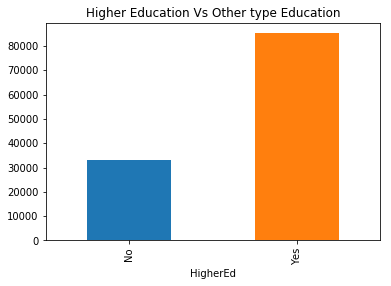

In [96]:
df.groupby(['HigherEd']).sum()['CareerSatisfaction'].plot(kind="bar");
plt.title("Higher Education Vs Other type Education");

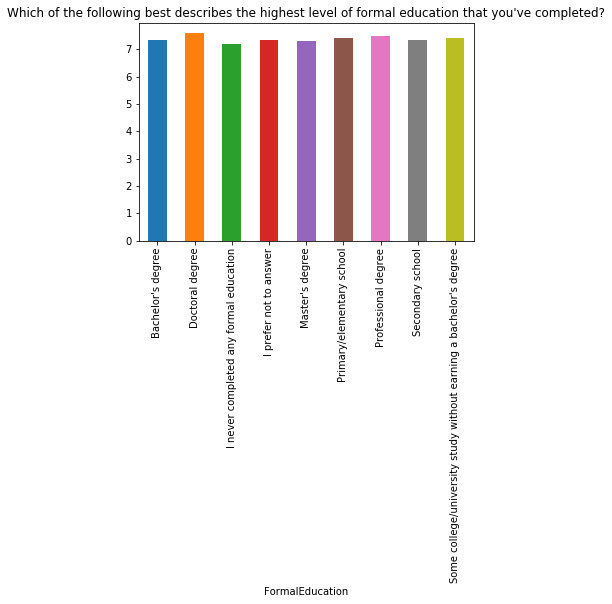

In [97]:
df.groupby(['FormalEducation']).mean()['CareerSatisfaction'].plot(kind="bar");
plt.title("Which of the following best describes the highest level of formal education that you've completed?");

In [99]:
df.groupby(['FormalEducation','Gender']).mean()['CareerSatisfaction'].reset_index()

,FormalEducation,Gender,CareerSatisfaction
0,Bachelor's degree,Female,7.278802
1,Bachelor's degree,Female; Gender non-conforming,6.857143
2,Bachelor's degree,Female; Transgender,6.500000
3,Bachelor's degree,Female; Transgender; Gender non-conforming,7.000000
4,Bachelor's degree,Gender non-conforming,6.454545
5,Bachelor's degree,Male,7.421789
6,Bachelor's degree,Male; Female,9.000000
7,Bachelor's degree,Male; Female; Transgender; Gender non-conforming,0.000000
8,Bachelor's degree,Male; Female; Transgender; Gender non-conformi...,8.000000
9,Bachelor's degree,Male; Gender non-conforming,7.545455
